In [49]:
import pandas as pd
import geopandas as gpd

In [50]:
globalData = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [51]:
globalCountries = globalData[globalData['Province/State'].isnull()][['Country/Region','Province/State']]

In [52]:
provinceCountries = ['Australia','Canada','China']

In [53]:
globalProvinces = globalData[(globalData['Country/Region']=='Australia') | (globalData['Country/Region']=='Canada') | (globalData['Country/Region']=='China')][['Country/Region','Province/State']]

In [90]:
usCounties = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')[['UID','Country_Region','Province_State']]

In [91]:
lookupTable = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')

In [92]:
lookupTable.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4.0,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8.0,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12.0,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20.0,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24.0,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


In [57]:
globalCountries = globalCountries.merge(lookupTable, left_on=["Country/Region","Province/State"], right_on=["Country_Region","Province_State"], how="left")[['Country/Region','Province/State','UID','iso2','iso3', 'Combined_Key', 'Population']]
globalProvinces = globalProvinces.merge(lookupTable, left_on=["Country/Region","Province/State"], right_on=["Country_Region","Province_State"], how="left")[['Country/Region','Province/State','UID','iso2','iso3', 'Combined_Key', 'Population']]

In [95]:
usCounties = usData.merge(lookupTable, on="UID", how="left")[['Country_Region_x','Province_State_x','UID','iso2','iso3','FIPS','Combined_Key', 'Population']]

In [96]:
usCounties.head()

,Country_Region_x,Province_State_x,UID,iso2,iso3,FIPS,Combined_Key,Population
0,US,Alabama,84001001,US,USA,1001.0,"Autauga, Alabama, US",55869.0
1,US,Alabama,84001003,US,USA,1003.0,"Baldwin, Alabama, US",223234.0
2,US,Alabama,84001005,US,USA,1005.0,"Barbour, Alabama, US",24686.0
3,US,Alabama,84001007,US,USA,1007.0,"Bibb, Alabama, US",22394.0
4,US,Alabama,84001009,US,USA,1009.0,"Blount, Alabama, US",57826.0


In [65]:
countries = gpd.read_file('./countries.geojson')[['ISO_A3','geometry']]

In [66]:
globalCountries = globalCountries.merge(countries, left_on="iso3", right_on="ISO_A3", how="left")

In [69]:
globalCountries = globalCountries[['Country/Region', 'Province/State', 'UID', 'iso2', 'iso3',
       'Combined_Key', 'Population', 'geometry']]

In [83]:
provinces = gpd.read_file('./jhu_world.geojson')

In [84]:
globalProvinces = globalProvinces.merge(provinces, left_on="Combined_Key", right_on="Combined_Key", how="left")

In [86]:
globalProvinces = globalProvinces[['Country/Region', 'Province/State', 'UID_x', 'iso2_x', 'iso3_x',
       'Combined_Key', 'Population_x', 'geometry_y']]
globalProvinces.columns = globalCountries.columns

In [88]:
globalCountries.head()

,Country/Region,Province/State,UID,iso2,iso3,Combined_Key,Population,geometry
0,Afghanistan,NaN,4.0,AF,AFG,Afghanistan,38928341.0,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
1,Albania,NaN,8.0,AL,ALB,Albania,2877800.0,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."
2,Algeria,NaN,12.0,DZ,DZA,Algeria,43851043.0,"MULTIPOLYGON (((8.60251 36.93951, 8.60566 36.9..."
3,Andorra,NaN,20.0,AD,AND,Andorra,77265.0,"MULTIPOLYGON (((1.70701 42.50278, 1.69750 42.4..."
4,Angola,NaN,24.0,AO,AGO,Angola,32866268.0,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."


In [87]:
globalProvinces.head()

,Country/Region,Province/State,UID,iso2,iso3,Combined_Key,Population,geometry
0,Australia,Australian Capital Territory,3601,AU,AUS,"Australian Capital Territory, Australia",428100.0,"POLYGON ((149.12686 -35.12815, 148.80891 -35.3..."
1,Australia,New South Wales,3602,AU,AUS,"New South Wales, Australia",8118000.0,"POLYGON ((153.54727 -28.17179, 153.48489 -28.1..."
2,Australia,Northern Territory,3603,AU,AUS,"Northern Territory, Australia",245600.0,"MULTIPOLYGON (((136.99750 -15.58597, 136.93527..."
3,Australia,Queensland,3604,AU,AUS,"Queensland, Australia",5115500.0,"MULTIPOLYGON (((153.45416 -27.38806, 153.41222..."
4,Australia,South Australia,3605,AU,AUS,"South Australia, Australia",1756500.0,"MULTIPOLYGON (((137.63019 -35.56408, 137.44676..."


In [89]:
usCounties

,Country/Region,Province/State,UID,iso2,iso3,Combined_Key,Population
0,US,Alabama,84001001,US,USA,"Autauga, Alabama, US",55869.0
1,US,Alabama,84001003,US,USA,"Baldwin, Alabama, US",223234.0
2,US,Alabama,84001005,US,USA,"Barbour, Alabama, US",24686.0
3,US,Alabama,84001007,US,USA,"Bibb, Alabama, US",22394.0
4,US,Alabama,84001009,US,USA,"Blount, Alabama, US",57826.0
...,...,...,...,...,...,...,...
3335,US,Wyoming,84056039,US,USA,"Teton, Wyoming, US",23464.0
3336,US,Wyoming,84056041,US,USA,"Uinta, Wyoming, US",20226.0
3337,US,Wyoming,84090056,US,USA,"Unassigned, Wyoming, US",NaN
3338,US,Wyoming,84056043,US,USA,"Washakie, Wyoming, US",7805.0


In [97]:
countiesGeom = gpd.read_file('./cb_2018_us_county_20m/cb_2018_us_county_20m.shp')

In [109]:
usCounties = usCounties[usCounties['FIPS'].notnull()]

In [110]:
usCounties['FIPS'] = usCounties['FIPS'].astype('int')
countiesGeom['GEOID'] = countiesGeom['GEOID'].astype('int')

<ipython-input-110-51a315040906>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usCounties['FIPS'] = usCounties['FIPS'].astype('int')


In [111]:
usCounties = usCounties.merge(countiesGeom[['GEOID','geometry']], left_on="FIPS", right_on="GEOID", how="left")

In [113]:
usCounties.columns

Index(['Country_Region_x', 'Province_State_x', 'UID', 'iso2', 'iso3', 'FIPS',
       'Combined_Key', 'Population', 'GEOID_x', 'geometry_x', 'GEOID_y',
       'geometry_y'],
      dtype='object')

In [114]:
usCounties=usCounties[['Country_Region_x', 'Province_State_x', 'UID', 'iso2', 'iso3', 
       'Combined_Key', 'Population','geometry_y']]
usCounties.columns = globalProvinces.columns

In [115]:
fullGeography = pd.concat([globalProvinces,globalCountries,usCounties])

In [119]:
fullGeographyGdf = gpd.GeoDataFrame(fullGeography, geometry=fullGeography.geometry)

<AxesSubplot:>

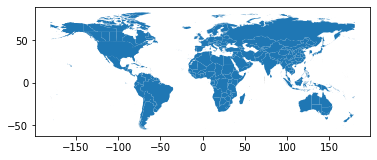

In [120]:
fullGeographyGdf.plot()

In [193]:
fullGeographyGdf[(fullGeographyGdf['UID'].notnull())&(fullGeographyGdf['geometry'].notnull())]['UID'].to_csv('JHU_valid_list.csv', index=False)

<ipython-input-193-18925f0f3599>:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  fullGeographyGdf[(fullGeographyGdf['UID'].notnull())&(fullGeographyGdf['geometry'].notnull())]['UID'].to_csv('JHU_valid_list.csv', index=False)


In [194]:
fullGeographyGdf[(fullGeographyGdf['UID'].notnull())&(fullGeographyGdf['geometry'].notnull())].to_file("jhu_global.geojson", driver='GeoJSON')

In [206]:
fullGeographyGdf[(fullGeographyGdf['UID'].notnull())&(fullGeographyGdf['geometry'].notnull())&(fullGeographyGdf.area>0)].to_file("jhu_global.geojson", driver='GeoJSON')

<hr>

# Data Fetching

In [138]:
globalCaseData = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
lookupTable = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')[['UID','Province_State','Country_Region']]
globalCaseData = lookupTable.merge(globalCaseData, left_on=['Province_State','Country_Region'], right_on=['Province/State', 'Country/Region'], how="right")

In [149]:
globalColumns = ['UID'] + list(globalCaseData.columns[7:])
globalCaseData = globalCaseData[globalColumns]

In [141]:
usCaseData = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [155]:
usCaseDataColumns = ['UID'] + list(usCaseData.columns[11:])
usCaseData = usCaseData[usCaseDataColumns]

In [157]:
fullCaseData = pd.concat([usCaseData,globalCaseData])

In [158]:
fullCaseData.to_csv('covid_confirmed_jhu.csv', index=False)

<hr>

In [186]:
globalDeathData = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
lookupTable = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')[['UID','Province_State','Country_Region']]
globalDeathData = lookupTable.merge(globalDeathData, left_on=['Province_State','Country_Region'], right_on=['Province/State', 'Country/Region'], how="right")

In [187]:
globalColumns = ['UID'] + list(globalDeathData.columns[7:])
globalDeathData = globalDeathData[globalColumns]

In [188]:
usDeathData = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [189]:
usDeathDataColumns = ['UID'] + list(usDeathData.columns[12:])
usDeathData = usDeathData[usDeathDataColumns]

In [190]:
fullDeathData = pd.concat([usDeathData,globalDeathData])

In [192]:
fullDeathData.to_csv('covid_deaths_jhu.csv', index=False)